In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd

In [56]:
# import dataset
df = pd.read_csv("student_lifestyle_dataset.csv")
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [57]:
# cek data null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [58]:
# Cek rata-rata
print("Rata-rata waktu belajar perhari: ", df.Study_Hours_Per_Day.mean())
print("Rata-rata waktu ekskul perhari: ", df.Extracurricular_Hours_Per_Day.mean())
print("Rata-rata waktu tidur perhari: ", df.Sleep_Hours_Per_Day.mean())
print("Rata-rata waktu sosial perhari: ", df.Social_Hours_Per_Day.mean())
print("Rata-rata waktu aktivitas fisik perhari: ", df.Physical_Activity_Hours_Per_Day.mean())
print("Rata-rata IPK: ", df.GPA.mean())
print("")
# Cek standar deviasi
print("Standar deviasi waktu belajar perhari: ", df.Study_Hours_Per_Day.std())
print("Standar deviasi waktu ekskul perhari: ", df.Extracurricular_Hours_Per_Day.std())
print("Standar deviasi waktu tidur perhari: ", df.Sleep_Hours_Per_Day.std())
print("Standar deviasi waktu sosial perhari: ", df.Social_Hours_Per_Day.std())
print("Standar deviasi waktu aktivitas fisik perhari: ", df.Physical_Activity_Hours_Per_Day.std())
print("Standar deviasi IPK: ", df.GPA.std())


Rata-rata waktu belajar perhari:  7.4758000000000004
Rata-rata waktu ekskul perhari:  1.9901
Rata-rata waktu tidur perhari:  7.50125
Rata-rata waktu sosial perhari:  2.7045500000000002
Rata-rata waktu aktivitas fisik perhari:  4.328300000000001
Rata-rata IPK:  3.11596

Standar deviasi waktu belajar perhari:  1.4238883695867885
Standar deviasi waktu ekskul perhari:  1.1558546578160238
Standar deviasi waktu tidur perhari:  1.4609485353055411
Standar deviasi waktu sosial perhari:  1.6885140915665198
Standar deviasi waktu aktivitas fisik perhari:  2.5141100780877457
Standar deviasi IPK:  0.29867353639160993


C:\Users\lenovo\AppData\Local\Temp\ipykernel_46804\3034751463.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_stress.values, y=correlation_with_stress.index, palette='coolwarm')


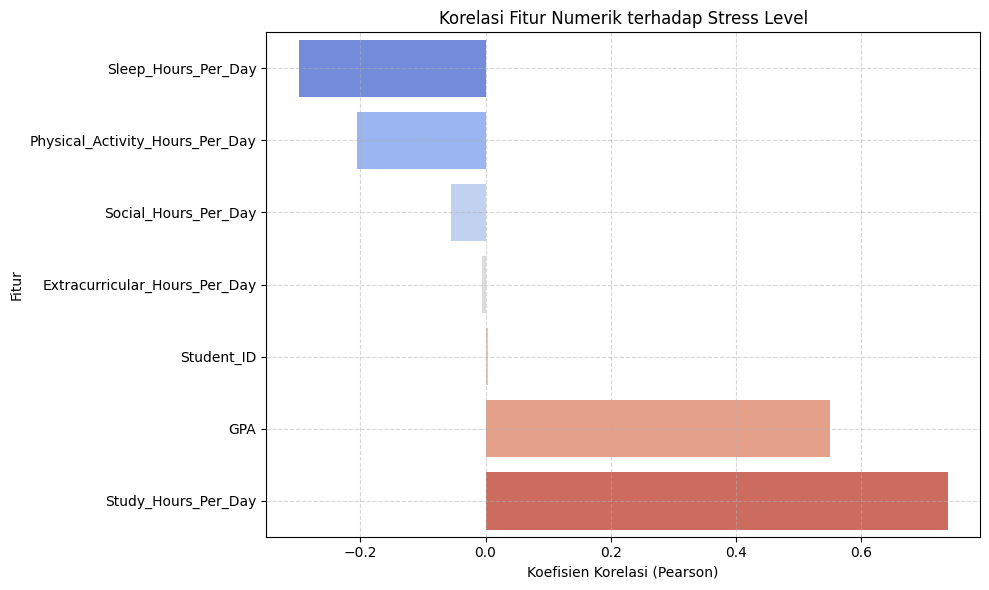

In [59]:
# tampilkan korelasi setiap kolom dengan kolom stress level

df_corr = df.copy()

# Mapping label kategori ke numerik
stress_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
df_corr['Stress_Level'] = df_corr['Stress_Level'].map(stress_mapping)

# Hitung korelasi antara semua kolom numerik
correlation_matrix = df_corr.corr(numeric_only=True)

# Ambil korelasi terhadap kolom Stress_Level (kecuali dirinya sendiri)
correlation_with_stress = correlation_matrix['Stress_Level'].drop('Stress_Level').sort_values()

# Visualisasikan dalam bentuk bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_stress.values, y=correlation_with_stress.index, palette='coolwarm')
plt.title('Korelasi Fitur Numerik terhadap Stress Level')
plt.xlabel('Koefisien Korelasi (Pearson)')
plt.ylabel('Fitur')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#  dari sini, diambil kolom study_hour_per_day, GPA, dan sleep_hour_per_day

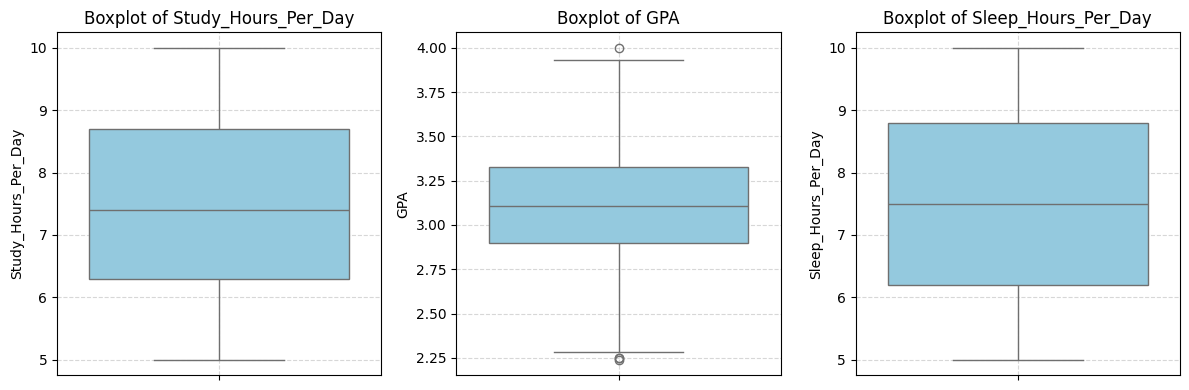

In [60]:
# cek outlier tiap kolom
plt.figure(figsize=(12, 4))

for i, col in enumerate(['Study_Hours_Per_Day', 'GPA', 'Sleep_Hours_Per_Day']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

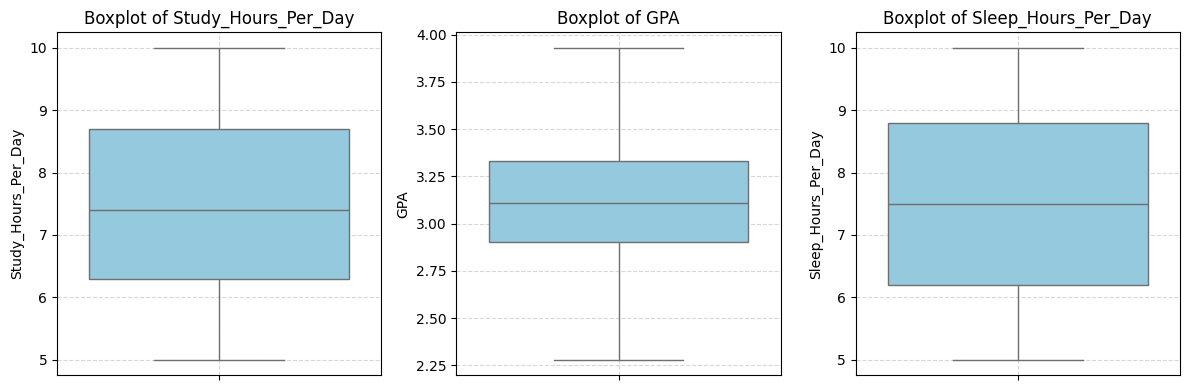

In [61]:
# hilangkan outlier menggunakan quartil
Q1 = df["GPA"].quantile(0.25)
Q3 = df["GPA"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df[(df["GPA"] >= lower_bound) & (df["GPA"] <= upper_bound)]

plt.figure(figsize=(12, 4))

for i, col in enumerate(['Study_Hours_Per_Day', 'GPA', 'Sleep_Hours_Per_Day']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df_clean[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [62]:
# hilangkan data duplikat
df_clean2 = df_clean.drop_duplicates(subset=["Study_Hours_Per_Day","GPA","Sleep_Hours_Per_Day"])
# cek apakah sudah tidak ada duplikat
df_clean2.duplicated(subset=["Study_Hours_Per_Day","GPA","Sleep_Hours_Per_Day"])

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 1982, dtype: bool

In [63]:
df_used = pd.DataFrame()
df_used["Student_ID"] = df_clean2["Student_ID"]
df_used["Study_Hours_Per_Day"] = df_clean2["Study_Hours_Per_Day"]
df_used["GPA"] = df_clean2["GPA"]
df_used["Sleep_Hours_Per_Day"] = df_clean2["Sleep_Hours_Per_Day"]
df_used["Stress_Level"] = df_clean2["Stress_Level"]
df_used

,Student_ID,Study_Hours_Per_Day,GPA,Sleep_Hours_Per_Day,Stress_Level
0,1,6.9,2.99,8.7,Moderate
1,2,5.3,2.75,8.0,Low
2,3,5.1,2.67,9.2,Low
3,4,6.5,2.88,7.2,Moderate
4,5,8.1,3.51,6.5,High
...,...,...,...,...,...
1995,1996,6.5,3.32,7.4,Moderate
1996,1997,6.3,2.65,8.8,Moderate
1997,1998,6.2,3.14,6.2,Moderate
1998,1999,8.1,3.04,7.6,High


In [64]:
# normalisasi data
df_used[['Study_Hours_Per_Day', 'GPA','Sleep_Hours_Per_Day']] = df_used[['Study_Hours_Per_Day', 'GPA','Sleep_Hours_Per_Day']].apply(
   lambda x: (x - x.min()) / (x.max() - x.min())
)
df_used

,Student_ID,Study_Hours_Per_Day,GPA,Sleep_Hours_Per_Day,Stress_Level
0,1,0.38,0.430303,0.74,Moderate
1,2,0.06,0.284848,0.60,Low
2,3,0.02,0.236364,0.84,Low
3,4,0.30,0.363636,0.44,Moderate
4,5,0.62,0.745455,0.30,High
...,...,...,...,...,...
1995,1996,0.30,0.630303,0.48,Moderate
1996,1997,0.26,0.224242,0.76,Moderate
1997,1998,0.24,0.521212,0.24,Moderate
1998,1999,0.62,0.460606,0.52,High


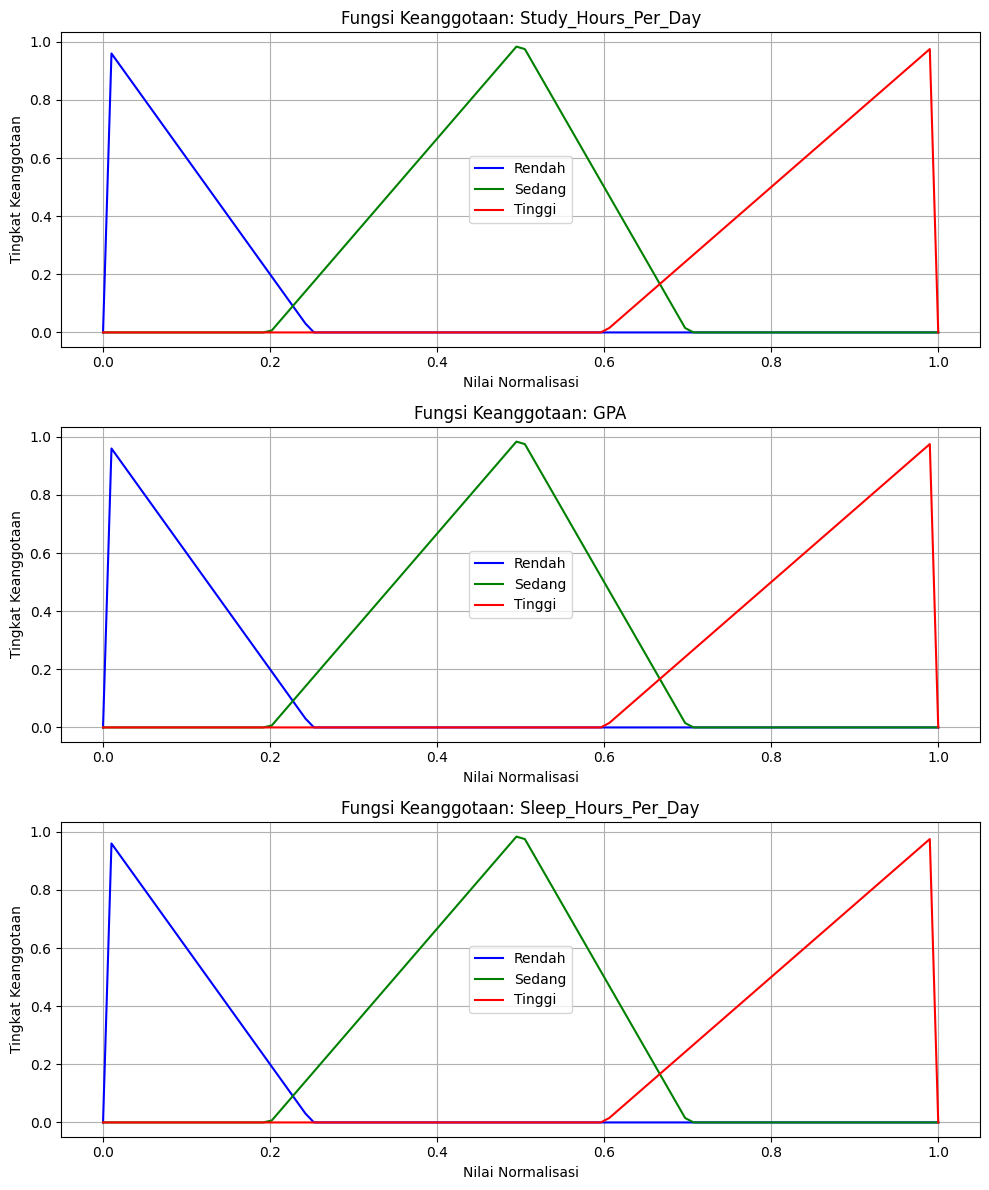

In [65]:
# buat fungsi keanggotaan
# Fungsi untuk membuat triangular membership function secara manual
def triangular(x, a, b, c):
    return np.maximum(np.minimum((x - a) / (b - a + 1e-9), (c - x) / (c - b + 1e-9)), 0)

# Range input
x = np.linspace(0, 1, 100)

# Study Hours
study_low = triangular(x, 0, 0, 0.25)
study_med = triangular(x, 0.20, 0.5, 0.7)
study_high = triangular(x, 0.6, 1.0, 1.0)

# GPA
gpa_low = triangular(x, 0, 0, 0.25)
gpa_med = triangular(x, 0.20, 0.5, 0.7)
gpa_high = triangular(x, 0.6, 1.0, 1.0)

# Sleep Hours
sleep_low = triangular(x, 0, 0, 0.25)
sleep_med = triangular(x, 0.20, 0.5, 0.70)
sleep_high = triangular(x, 0.6, 1.0, 1.0)


# Plotting
fig, axs = plt.subplots(nrows=3, figsize=(10, 12))

# Study Hours
axs[0].plot(x, study_low, 'b', label='Rendah')
axs[0].plot(x, study_med, 'g', label='Sedang')
axs[0].plot(x, study_high, 'r', label='Tinggi')
axs[0].set_title('Fungsi Keanggotaan: Study_Hours_Per_Day')
axs[0].legend()

# GPA
axs[1].plot(x, gpa_low, 'b', label='Rendah')
axs[1].plot(x, gpa_med, 'g', label='Sedang')
axs[1].plot(x, gpa_high, 'r', label='Tinggi')
axs[1].set_title('Fungsi Keanggotaan: GPA')
axs[1].legend()

# Sleep Hours
axs[2].plot(x, sleep_low, 'b', label='Rendah')
axs[2].plot(x, sleep_med, 'g', label='Sedang')
axs[2].plot(x, sleep_high, 'r', label='Tinggi')
axs[2].set_title('Fungsi Keanggotaan: Sleep_Hours_Per_Day')
axs[2].legend()

for ax in axs:
    ax.set_xlabel('Nilai Normalisasi')
    ax.set_ylabel('Tingkat Keanggotaan')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [66]:
# buat fuzzyfikasi
def fuzzify(value, a, b, c):
    if value <= a:
        return 0
    elif a < value < b:
        return (value - a) / (b - a + 1e-9)
    elif b <= value < c:
        return (c - value) / (c - b + 1e-9)
    else:
        return 0

def fuzzify_row_study(row):
    study = row['Study_Hours_Per_Day']

    study_membership = {
        'rendah': fuzzify(study, 0, 0, 0.25),
        'sedang': fuzzify(study, 0.20, 0.5, 0.70),
        'tinggi': fuzzify(study, 0.6, 1.0, 1.0)
    }
    return {
        'study': study_membership,
    }

def fuzzify_row_gpa(row):
    gpa = row['GPA']

    gpa_membership = {
        'rendah': fuzzify(gpa, 0, 0, 0.25),
        'sedang': fuzzify(gpa, 0.20, 0.5, 0.70),
        'tinggi': fuzzify(gpa, 0.6, 1.0, 1.0)
    }

    return {
        'gpa': gpa_membership
    }

def fuzzify_row_sleep(row):
    sleep = row['Sleep_Hours_Per_Day']

    sleep_membership = {
        'rendah': fuzzify(sleep, 0, 0, 0.25),
        'sedang': fuzzify(sleep, 0.20, 0.50, 0.70),
        'tinggi': fuzzify(sleep, 0.60, 1.0, 1.0)
    }

    return {
        'sleep': sleep_membership
    }


df_fuzzy = pd.DataFrame()
df_fuzzy['Student_ID'] = df_used['Student_ID']
df_fuzzy['fuzzy_study'] = df_used.apply(fuzzify_row_study, axis=1)
df_fuzzy['fuzzy_gpa'] = df_used.apply(fuzzify_row_gpa, axis=1)
df_fuzzy['fuzzy_sleep'] = df_used.apply(fuzzify_row_sleep, axis=1)

df_fuzzy

,Student_ID,fuzzy_study,fuzzy_gpa,fuzzy_sleep
0,1,"{'study': {'rendah': 0, 'sedang': 0.5999999980...","{'gpa': {'rendah': 0, 'sedang': 0.767676765117...","{'sleep': {'rendah': 0, 'sedang': 0, 'tinggi':..."
1,2,"{'study': {'rendah': 0.7599999969600001, 'seda...","{'gpa': {'rendah': 0, 'sedang': 0.282828281885...","{'sleep': {'rendah': 0, 'sedang': 0.4999999975..."
2,3,"{'study': {'rendah': 0.9199999963200002, 'seda...","{'gpa': {'rendah': 0.05454545432727263, 'sedan...","{'sleep': {'rendah': 0, 'sedang': 0, 'tinggi':..."
3,4,"{'study': {'rendah': 0, 'sedang': 0.3333333322...","{'gpa': {'rendah': 0, 'sedang': 0.545454543636...","{'sleep': {'rendah': 0, 'sedang': 0.7999999973..."
4,5,"{'study': {'rendah': 0, 'sedang': 0.3999999980...","{'gpa': {'rendah': 0, 'sedang': 0, 'tinggi': 0...","{'sleep': {'rendah': 0, 'sedang': 0.3333333322..."
...,...,...,...,...
1995,1996,"{'study': {'rendah': 0, 'sedang': 0.3333333322...","{'gpa': {'rendah': 0, 'sedang': 0.348484846742...","{'sleep': {'rendah': 0, 'sedang': 0.9333333302..."
1996,1997,"{'study': {'rendah': 0, 'sedang': 0.1999999993...","{'gpa': {'rendah': 0.10303030261818169, 'sedan...","{'sleep': {'rendah': 0, 'sedang': 0, 'tinggi':..."
1997,1998,"{'study': {'rendah': 0.03999999983999981, 'sed...","{'gpa': {'rendah': 0, 'sedang': 0.893939389469...","{'sleep': {'rendah': 0.03999999983999981, 'sed..."
1998,1999,"{'study': {'rendah': 0, 'sedang': 0.3999999980...","{'gpa': {'rendah': 0, 'sedang': 0.868686865791...","{'sleep': {'rendah': 0, 'sedang': 0.8999999955..."


In [67]:

df_fuzzy_result = pd.DataFrame()
df_fuzzy_result["Student_ID"] = df_fuzzy["Student_ID"]

all_rendah = list()
all_sedang = list()
all_tinggi = list()

for i in range(df_fuzzy["Student_ID"].count()):
    dict_sleep_raw = df_fuzzy.iloc[i]["fuzzy_sleep"]
    dict_sleep = dict_sleep_raw.get("sleep", dict_sleep_raw)
    # dict_sleep = {k: dict_sleep.get(k, 0) for k in ["sedikit", "cukup", "banyak"]}

    dict_GPA_raw = df_fuzzy.iloc[i]["fuzzy_gpa"]
    dict_GPA = dict_GPA_raw.get("gpa", dict_GPA_raw)
   # dict_GPA = {k: dict_GPA.get(k, 0) for k in ["rendah", "sedang", "tinggi"]}

    dict_study_raw = df_fuzzy.iloc[i]["fuzzy_study"]
    dict_study = dict_study_raw.get("study", dict_study_raw) 
   # dict_study = {k: dict_study.get(k, 0) for k in ["rendah", "sedang", "tinggi"]} tujuan code ini 
    #Itu untuk memastikan bahwa semua key yang dibutuhkan tetap ada. Misal kalau "sedikit" tidak ada, dia akan diberi nilai default 0. Ini untuk mencegah error saat nanti kamu tulis:
    # fuzzy rule
    list_rendah = []   # Low
    list_sedang = []   # Moderate
    list_tinggi = []   # High
    
    
    rule1 = min(dict_sleep["rendah"], dict_GPA["rendah"], dict_study["rendah"])
    list_sedang.append(rule1)  
    
    rule2 = min(dict_sleep["rendah"], dict_GPA["rendah"], dict_study["sedang"])
    list_sedang.append(rule2)  
    
    rule3 = min(dict_sleep["rendah"], dict_GPA["rendah"], dict_study["tinggi"])
    list_tinggi.append(rule3) 
    
    
    rule4 = min(dict_sleep["rendah"], dict_GPA["sedang"], dict_study["rendah"])
    list_sedang.append(rule4) 
    
    rule5 = min(dict_sleep["rendah"], dict_GPA["sedang"], dict_study["sedang"])
    list_tinggi.append(rule5)  
    
    rule6 = min(dict_sleep["rendah"], dict_GPA["sedang"], dict_study["tinggi"])
    list_tinggi.append(rule6) 
    
    
    rule7 = min(dict_sleep["rendah"], dict_GPA["tinggi"], dict_study["rendah"])
    list_sedang.append(rule7) 
    
    rule8 = min(dict_sleep["rendah"], dict_GPA["tinggi"], dict_study["sedang"])
    list_tinggi.append(rule8)  
    
    rule9 = min(dict_sleep["rendah"], dict_GPA["tinggi"], dict_study["tinggi"])
    list_tinggi.append(rule9) 
    
    
    rule10 = min(dict_sleep["sedang"], dict_GPA["rendah"], dict_study["rendah"])
    list_rendah.append(rule10)  
    
    rule11 = min(dict_sleep["sedang"], dict_GPA["rendah"], dict_study["sedang"])
    list_rendah.append(rule11)  
    
    rule12 = min(dict_sleep["sedang"], dict_GPA["rendah"], dict_study["tinggi"])
    list_sedang.append(rule12)  
    
    
    rule13 = min(dict_sleep["sedang"], dict_GPA["sedang"], dict_study["rendah"])
    list_rendah.append(rule13)  
    
    rule14 = min(dict_sleep["sedang"], dict_GPA["sedang"], dict_study["sedang"])
    list_sedang.append(rule14) 
    
    rule15 = min(dict_sleep["sedang"], dict_GPA["sedang"], dict_study["tinggi"])
    list_tinggi.append(rule15) 
    
    
    rule16 = min(dict_sleep["sedang"], dict_GPA["tinggi"], dict_study["rendah"])
    list_tinggi.append(rule16)  
    
    rule17 = min(dict_sleep["sedang"], dict_GPA["tinggi"], dict_study["sedang"])
    list_tinggi.append(rule17)  
    
    rule18 = min(dict_sleep["sedang"], dict_GPA["tinggi"], dict_study["tinggi"])
    list_tinggi.append(rule18)  
    
    
    rule19 = min(dict_sleep["tinggi"], dict_GPA["rendah"], dict_study["rendah"])
    list_rendah.append(rule19)  
    
    rule20 = min(dict_sleep["tinggi"], dict_GPA["rendah"], dict_study["sedang"])
    list_rendah.append(rule20)  
    
    rule21 = min(dict_sleep["tinggi"], dict_GPA["rendah"], dict_study["tinggi"])
    list_tinggi.append(rule21)  
    
    
    rule22 = min(dict_sleep["tinggi"], dict_GPA["sedang"], dict_study["rendah"])
    list_rendah.append(rule22)  
    
    rule23 = min(dict_sleep["tinggi"], dict_GPA["sedang"], dict_study["sedang"])
    list_sedang.append(rule23)  
    
    rule24 = min(dict_sleep["tinggi"], dict_GPA["sedang"], dict_study["tinggi"])
    list_tinggi.append(rule24)  
    
    
    rule25 = min(dict_sleep["tinggi"], dict_GPA["tinggi"], dict_study["rendah"])
    list_sedang.append(rule25)  
    
    rule26 = min(dict_sleep["tinggi"], dict_GPA["tinggi"], dict_study["sedang"])
    list_tinggi.append(rule26)
    
    rule27 = min(dict_sleep["tinggi"], dict_GPA["tinggi"], dict_study["tinggi"])
    list_tinggi.append(rule27)

    # Simpan hasil akhir ke dataframe
    all_rendah.append(max(list_rendah)) # mengambil nilai max dari semua rendah
    all_sedang.append(max(list_sedang)) # mengambil nilai max dari semua sedang
    all_tinggi.append(max(list_tinggi)) # mengambil nilai max dari semua tinggi

df_fuzzy_result["stress_level_rendah"] = all_rendah
df_fuzzy_result["stress_level_sedang"] = all_sedang
df_fuzzy_result["stress_level_tinggi"] = all_tinggi
df_fuzzy_result



    
    

    

,Student_ID,stress_level_rendah,stress_level_sedang,stress_level_tinggi
0,1,0.000000,0.350000,0.000000
1,2,0.282828,0.000000,0.000000
2,3,0.121212,0.000000,0.000000
3,4,0.000000,0.333333,0.000000
4,5,0.000000,0.000000,0.333333
...,...,...,...,...
1995,1996,0.000000,0.333333,0.075758
1996,1997,0.103030,0.080808,0.000000
1997,1998,0.040000,0.133333,0.040000
1998,1999,0.000000,0.400000,0.050000


In [68]:
# sugeno_count
def sugeno_count(row):
    return (row["stress_level_rendah"] * 25 + row["stress_level_sedang"] * 65 + row["stress_level_tinggi"] * 100)/((row["stress_level_rendah"]+ row["stress_level_sedang"]+ row["stress_level_tinggi"]))  
    

# sugeno z score
df_fuzzy_result["sugeno_z"] = df_fuzzy_result.apply(sugeno_count,axis=1)

# buat prediksi
def sugeno_result(row):
    if row["sugeno_z"] <= 27.0:
        return "Low"
    elif row["sugeno_z"] <= 77.0:
        return "Moderate"
    else:
        return "High"

df_fuzzy_result["sugno_pred"] = df_fuzzy_result.apply(sugeno_result,axis=1)
df_fuzzy_result

C:\Users\lenovo\AppData\Local\Temp\ipykernel_46804\279326899.py:3: RuntimeWarning: invalid value encountered in scalar divide
  return (row["stress_level_rendah"] * 25 + row["stress_level_sedang"] * 65 + row["stress_level_tinggi"] * 100)/((row["stress_level_rendah"]+ row["stress_level_sedang"]+ row["stress_level_tinggi"]))


,Student_ID,stress_level_rendah,stress_level_sedang,stress_level_tinggi,sugeno_z,sugno_pred
0,1,0.000000,0.350000,0.000000,65.000000,Moderate
1,2,0.282828,0.000000,0.000000,25.000000,Low
2,3,0.121212,0.000000,0.000000,25.000000,Low
3,4,0.000000,0.333333,0.000000,65.000000,Moderate
4,5,0.000000,0.000000,0.333333,100.000000,High
...,...,...,...,...,...,...
1995,1996,0.000000,0.333333,0.075758,71.481481,Moderate
1996,1997,0.103030,0.080808,0.000000,42.582418,Moderate
1997,1998,0.040000,0.133333,0.040000,64.062500,Moderate
1998,1999,0.000000,0.400000,0.050000,68.888889,Moderate


              precision    recall  f1-score   support

         Low       0.83      0.83      0.83       289
    Moderate       0.79      0.81      0.80       670
        High       0.90      0.89      0.89      1023

    accuracy                           0.85      1982
   macro avg       0.84      0.84      0.84      1982
weighted avg       0.85      0.85      0.85      1982



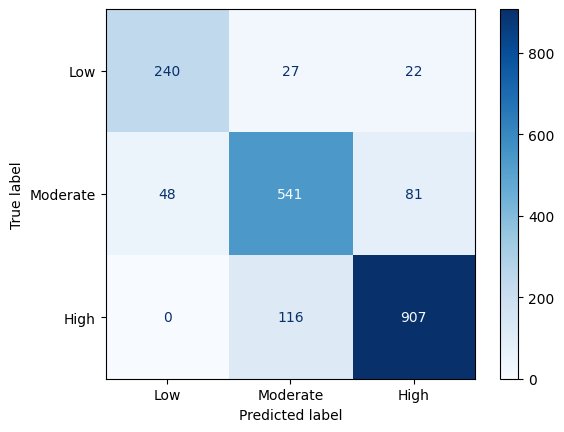

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['Low', 'Moderate', 'High']
cm = confusion_matrix(df_used['Stress_Level'],df_fuzzy_result['sugno_pred'], labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')

from sklearn.metrics import classification_report

print(classification_report(df_used['Stress_Level'],df_fuzzy_result['sugno_pred'], labels=labels))

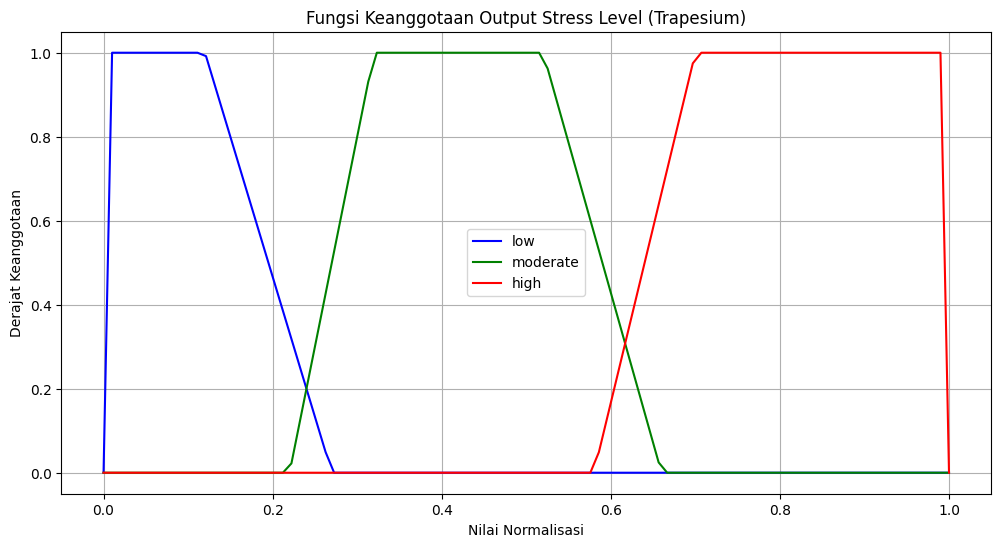

In [70]:
# Mamdani Method


def trapmf(x, a, b, c, d):
    return np.maximum(
        np.minimum(
            np.minimum((x - a) / (b - a + 1e-6), 1),
            (d - x) / (d - c + 1e-6)
        ),
        0
    )

x = np.linspace(0, 1, 100)

# Study Hours (gunakan bentuk trapesium)

low      = trapmf(x, 0.0, 0.0, 0.12, 0.27)
moderate = trapmf(x, 0.22, 0.32, 0.52, 0.66)
high     = trapmf(x, 0.58, 0.70, 1.0, 1.0) 

# Plotting
fig, axs = plt.subplots(nrows=1, figsize=(12, 6))

axs.plot(x, low, 'b', label='low')
axs.plot(x, moderate, 'g', label='moderate')
axs.plot(x, high, 'r', label='high')
axs.set_title('Fungsi Keanggotaan Output Stress Level (Trapesium)')
axs.set_xlabel('Nilai Normalisasi')
axs.set_ylabel('Derajat Keanggotaan')
axs.legend()
plt.grid(True)
plt.show()


In [71]:

low      = trapmf(x, 0.0, 0.0, 0.12, 0.27)
moderate = trapmf(x, 0.22, 0.32, 0.52, 0.66)
high     = trapmf(x, 0.58, 0.70, 1.0, 1.0)


# Fungsi defuzzifikasi dengan metode centroid
def defuzzify_row_cog(row):
    # Aplikasi aturan fuzzy (menggunakan operator minimum)
    low_cut = np.minimum(low, row['stress_level_rendah'])
    moderate_cut = np.minimum(moderate, row['stress_level_sedang'])
    high_cut = np.minimum(high, row['stress_level_tinggi'] *2.5 )  # Bobot untuk stress tinggi
    
    # Proses agregasi dengan operator maximum
    aggregated = np.maximum.reduce([low_cut, moderate_cut, high_cut])
    
    # Hindari pembagian dengan nol
    if np.sum(aggregated) == 0:
        return 0
    
    # Center of Gravity calculation
    # Menggunakan integrasi diskrit untuk menghitung moment dan area
    moment = 0
    area = 0
    
    dx = x[1] - x[0]  # Interval diskritisasi x
    
    for i in range(len(x)):
        moment += x[i] * aggregated[i] * dx
        area += aggregated[i] * dx
    
    if area == 0:
        return 0
        
    # Mengembalikan CoG
    return moment / area

# Hitung defuzzifikasi untuk setiap baris
df_fuzzy_result['stress_level_defuzz'] = df_fuzzy_result.apply(defuzzify_row_cog, axis=1)


# Ambil kolom yang dibutuhkan
output_df = df_fuzzy_result[['Student_ID', 'stress_level_defuzz']]

# Buat label kategori dengan threshold yang disesuaikan berdasarkan distribusi hasil defuzzifikasi
def mamdani_result(row):
    if row["stress_level_defuzz"] <= 0.28:
        return "Low"
    elif row["stress_level_defuzz"] <= 0.59:
        return "Moderate"
    else:
        return "High"

output_df["mamdani_pred"] = output_df.apply(mamdani_result, axis=1)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_46804\3609871420.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df["mamdani_pred"] = output_df.apply(mamdani_result, axis=1)


              precision    recall  f1-score   support

         Low       0.71      0.95      0.81       289
    Moderate       0.83      0.78      0.80       670
        High       0.91      0.86      0.88      1023

    accuracy                           0.84      1982
   macro avg       0.82      0.86      0.83      1982
weighted avg       0.85      0.84      0.85      1982



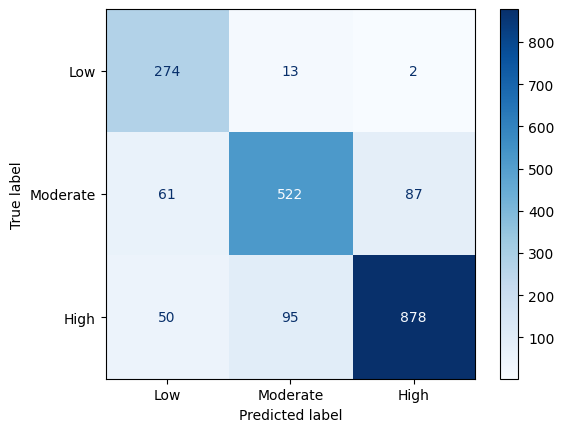

In [72]:
labels = ['Low', 'Moderate', 'High']
cm = confusion_matrix(df_used['Stress_Level'],output_df['mamdani_pred'], labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')

from sklearn.metrics import classification_report

print(classification_report(df_used['Stress_Level'],output_df['mamdani_pred'], labels=labels))